In [12]:
import h5py
import matplotlib.pyplot as plt

file_path = './data/fastmri_multicoil_train_T2_h5/file_brain_AXT2_200_2000057.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as file:
    # Print all available datasets/keys
    print("Available keys in the file:", list(file.keys()))
    ismrmrd_header = file['ismrmrd_header']
    kspace = file['kspace'][:]
    reconstruction_rss = file['reconstruction_rss'][:]


Available keys in the file: ['ismrmrd_header', 'kspace', 'reconstruction_rss']


In [11]:
print(kspace.shape)
print(reconstruction_rss.shape)

(16, 20, 768, 396)
(16, 384, 384)


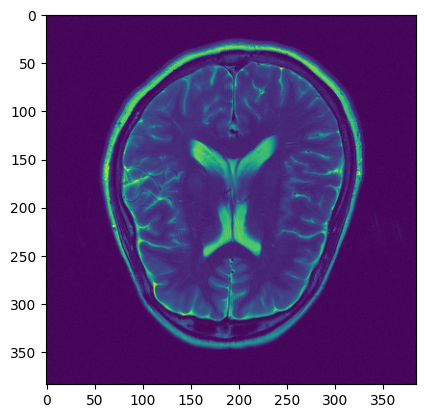

In [13]:
plt.imshow(reconstruction_rss[0])

In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from numpy.fft import ifft2, ifftshift


# Assume kspace has shape (16, 20, 768, 396)
num_coils = kspace.shape[0]
num_slices = kspace.shape[1]
height = kspace.shape[2]
width = kspace.shape[3]

# Step 1: Combine k-space data from multiple coils using RSS (Root Sum of Squares)
# Assuming k-space is complex (real + imaginary), you need to combine the real and imaginary parts.
combined_kspace = np.zeros((num_slices, height, width), dtype=np.complex)

for i in range(num_slices):
    # Combine coils in k-space (RSS method)
    sum_of_squares = np.zeros((height, width), dtype=np.complex)
    for coil in range(num_coils):
        sum_of_squares += kspace[coil, i] ** 2
    
    combined_kspace[i] = np.sqrt(sum_of_squares)

# Step 2: Perform Inverse Fourier Transform to reconstruct image
# Apply inverse FFT to the combined k-space
reconstruction = np.zeros_like(combined_kspace, dtype=np.complex)

for i in range(num_slices):
    reconstruction[i] = ifft2(ifftshift(combined_kspace[i]))

# Step 3: You may want to get the magnitude of the reconstructed image
reconstruction_magnitude = np.abs(reconstruction)

# For visualization, plot the magnitude of one slice of the reconstruction
plt.imshow(reconstruction_magnitude[0], cmap='gray')
plt.title('Reconstructed MRI Slice')
plt.colorbar()
plt.show()


AttributeError: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations